<html>
    <body>
        <h1 align='center'>Final Project</h1>
        <img align='center' src="https://i.imgur.com/x3rrQyy.png" width="400" height="200"></img>
    </body>
</html>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

plt.style.use('fivethirtyeight')

## STEP 1 Formulate the Project Research Framework)

 

The Scientific method stipulates the following sequence of steps:

•Formulation of a research question.•Proposing a Hypothesis, a  conjecture tied to the research question based on the knowledge of the data .•Prediction helps identify the consequences of the hypothesis.•Testing involves the process of experimentation toascertain the validity of the prediction espoused by the hypothesis.•The final step entails the analysis and interpretation of the prediction and panning the next steps.

#### Discuss and choose your data

### Introduction
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy

Without ongoing, careful management, diabetes can lead to a buildup of sugars in the blood, which can increase the risk of dangerous complications, including stroke and heart disease.

Different kinds of diabetes can occur, and managing the condition depends on the type. Not all forms of diabetes stem from a person being overweight or leading an inactive lifestyle. In fact, some are present from childhood.

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Data

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)


<hr>

#### Formulate preliminary research topic and specific research questions. State them clearly.


The main research I want to conduct as part of the analysis of this dataset:
    * Is there any correlation among different columns of the dataset?
    * Can I build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?
    * What is the best machine learning model with the highest accuracy, precision and recall?

## Step 2 Data Science Analysis 

### 2.1 Descriptive Statistics

In [167]:
df = pd.read_csv('diabetes.csv')

#### Amongst the variables of interest identify one that is categorical and one that is quantitative

In [168]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


As we can see from the above table, Outcome is clearly an categorical variable. Rest of the columns are good candidates for quantitative columns. 

#### 2.1.1 Numerical Summaries

#### a) For the categorical variable create a frequency distribution.
#### b) For the categorical variable create a bar diagram.

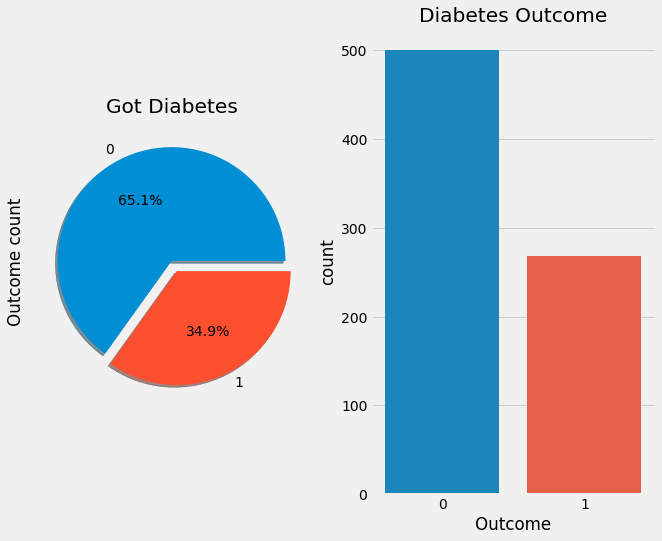

In [170]:
## checking the balance of the data by plotting the count of outcomes by their value
f,ax=plt.subplots(1,2,figsize=(10,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Got Diabetes')
ax[0].set_ylabel('Outcome count')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Diabetes Outcome')
plt.show()

<AxesSubplot:>

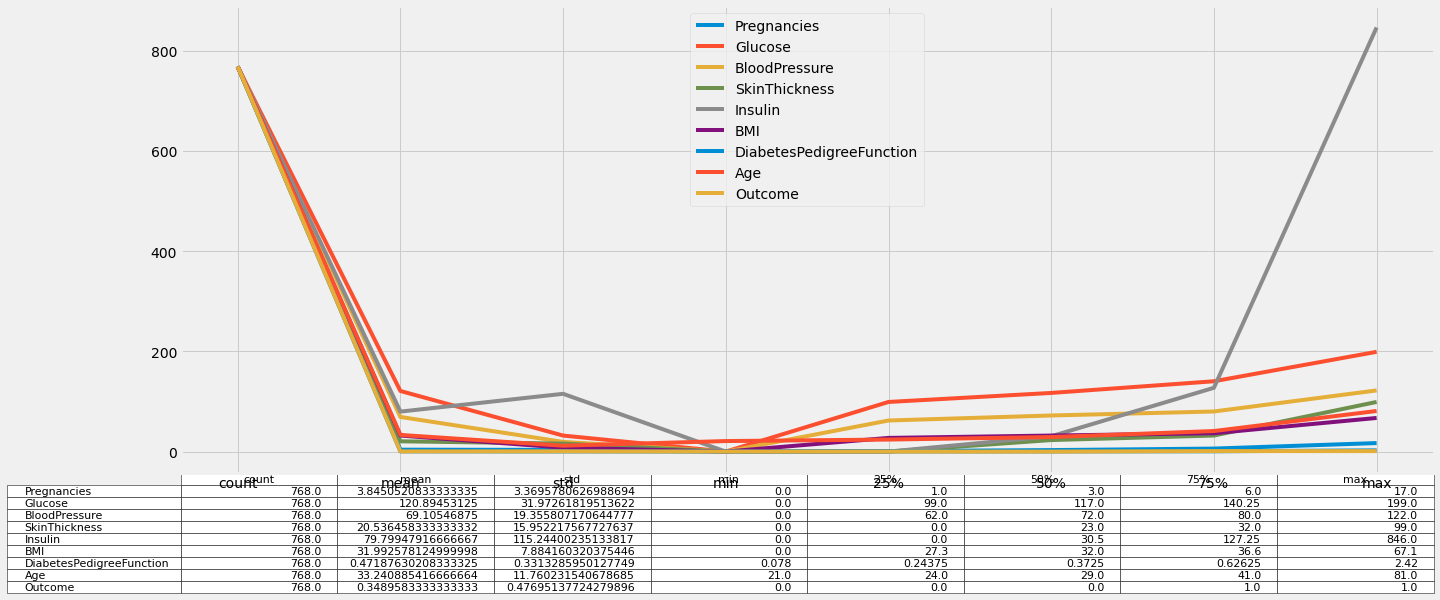

In [171]:
df.describe().plot(figsize=(20,8),table=True)

In [172]:
df.describe().loc[['std','mean', '50%']].T

,std,mean,50%
Pregnancies,3.369578,3.845052,3.0000
Glucose,31.972618,120.894531,117.0000
BloodPressure,19.355807,69.105469,72.0000
SkinThickness,15.952218,20.536458,23.0000
Insulin,115.244002,79.799479,30.5000
BMI,7.884160,31.992578,32.0000
DiabetesPedigreeFunction,0.331329,0.471876,0.3725
Age,11.760232,33.240885,29.0000
Outcome,0.476951,0.348958,0.0000


<b> Findings: </b>
 * Insulin, Glucose, Blood Pressure have very high std deviations respectively
 * Glucose, Blood Pressure, Insulin and BMI have very high mean
 * Glucose, Blood Pressure, BMI, Insulin have very high medians
 * DiabetesPedigreeFunction has the least variance of data. 
 * Since we almost twice the number of `Outcome=1` data as compared to `Outcome=0`, the data is skewed for non-diabetics cases

#### 2.1.2 Graphical Summaries

#### a) For the quantitative variable create numerical summaries grouped by a categorical variable.

<b> For Diabetics cases

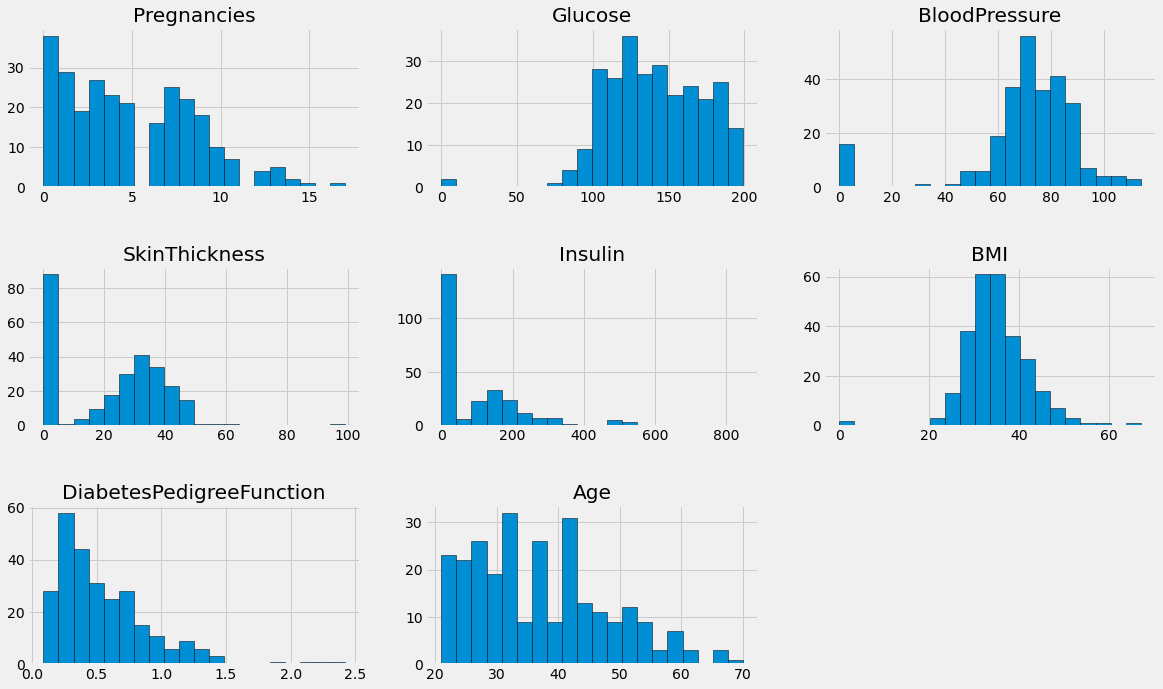

In [173]:
import itertools
dia_df=df[df['Outcome']==1]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dia_df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<b> For non-diabetics cases

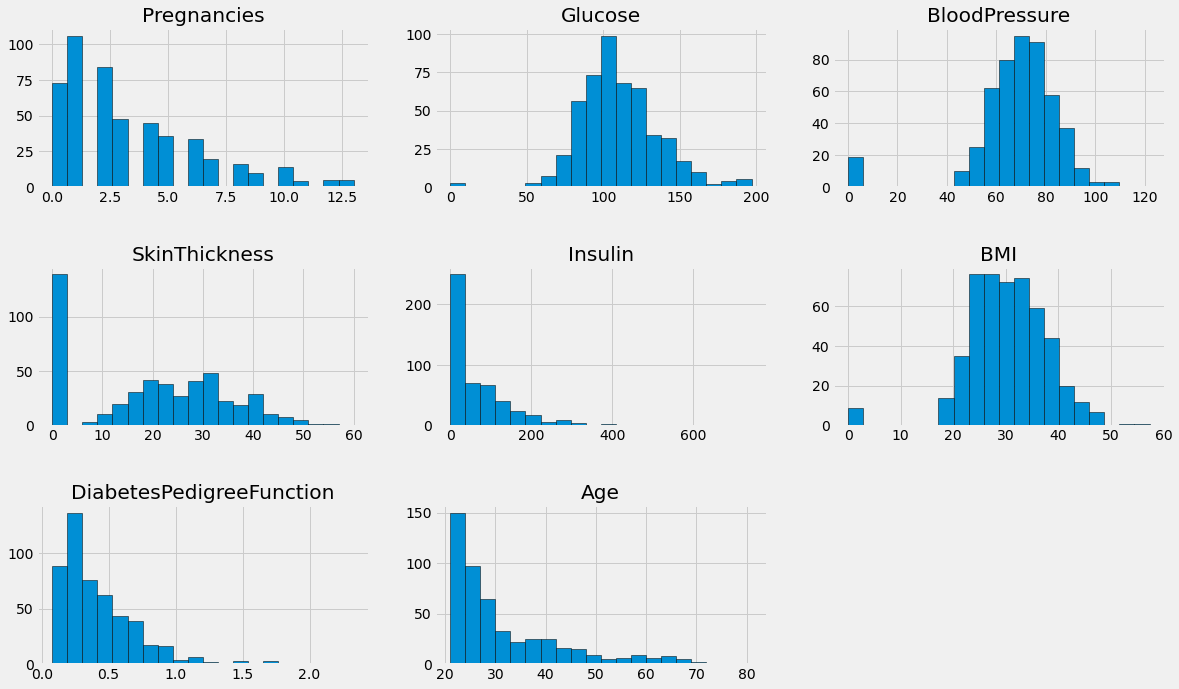

In [174]:
df_ndiab=df[df['Outcome']==0]
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df_ndiab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


<b> Pair Plot

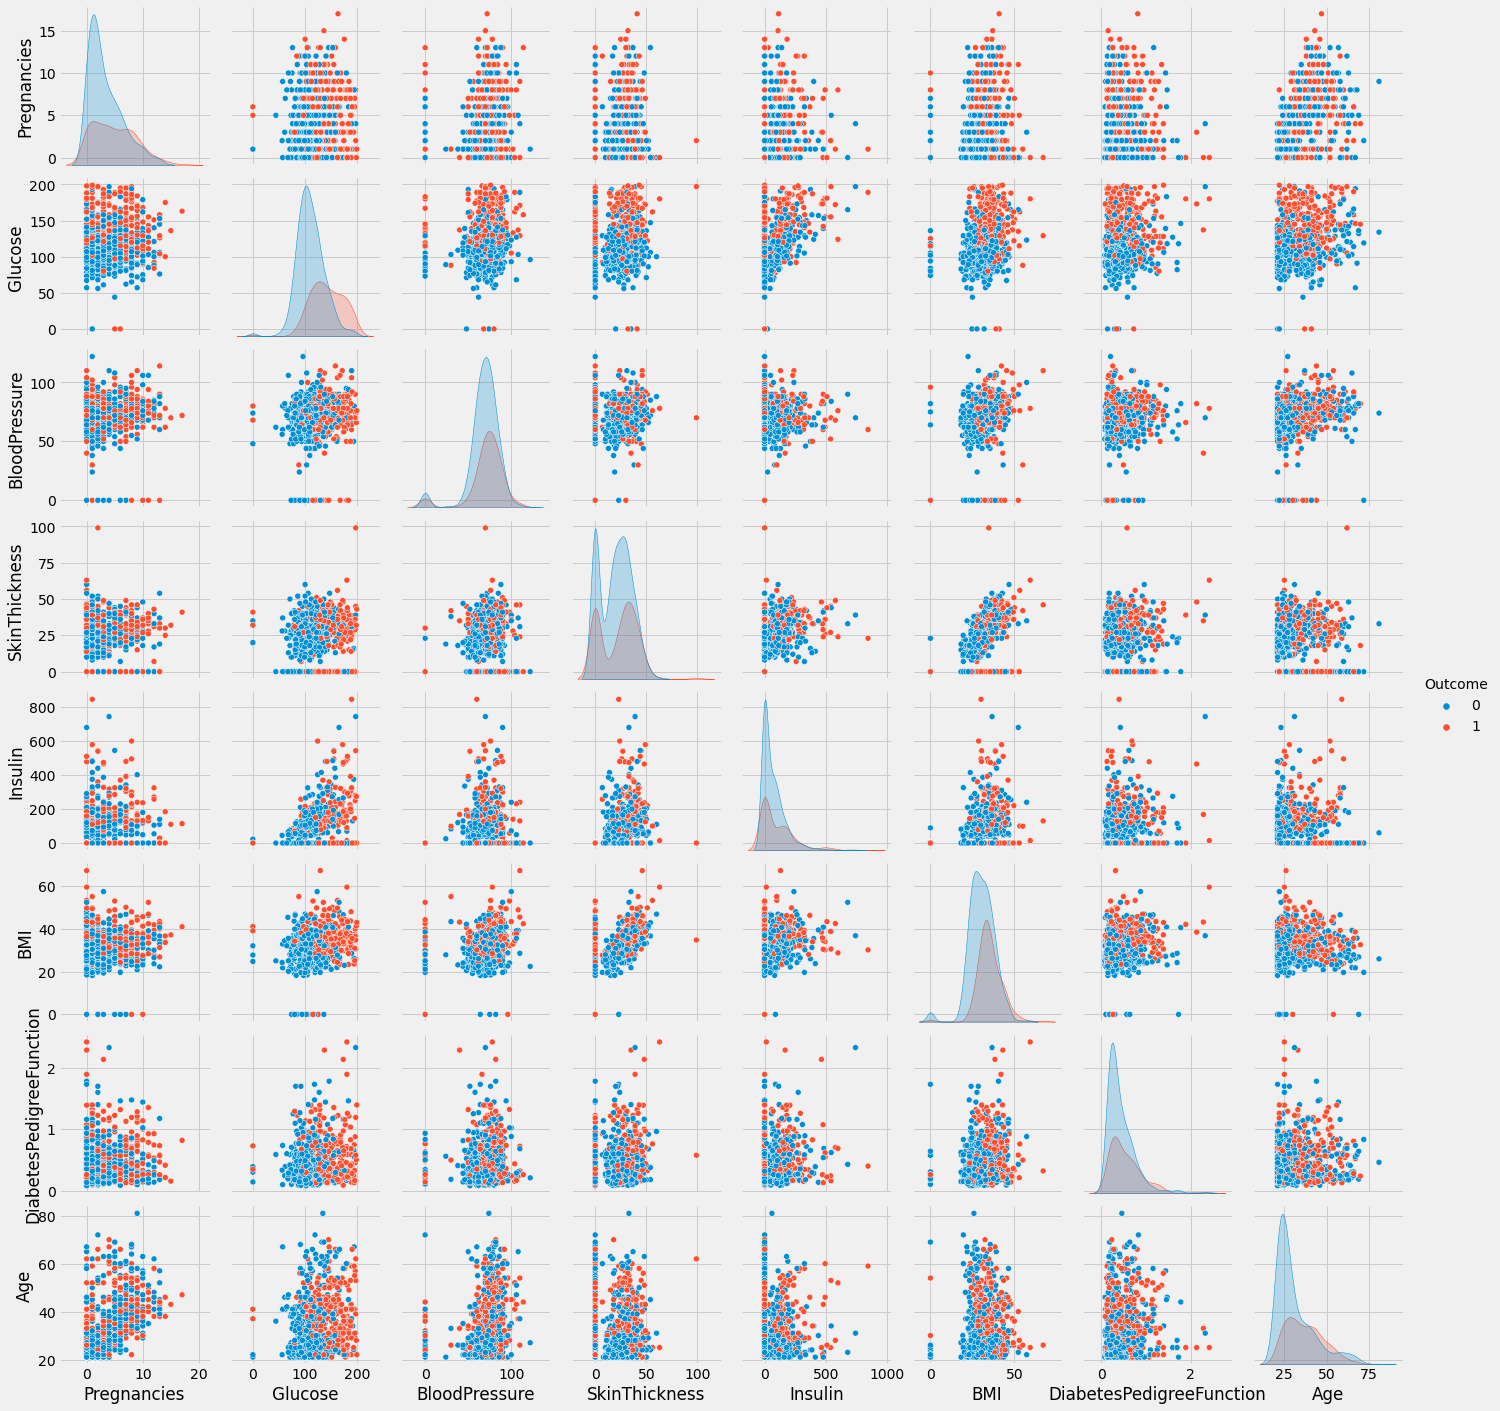

In [106]:
sns.pairplot(data=df,hue='Outcome',diag_kind='kde')
plt.show()

#### Observations:

* The diagonal shows the distribution of the the dataset with the kernel density plots.

* The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances.



#### b) For quantitative variable create a histogram and a boxplot grouped by categorical

Text(0.5, 1.0, 'Distribution plot of Outcome vs Pregnancies')

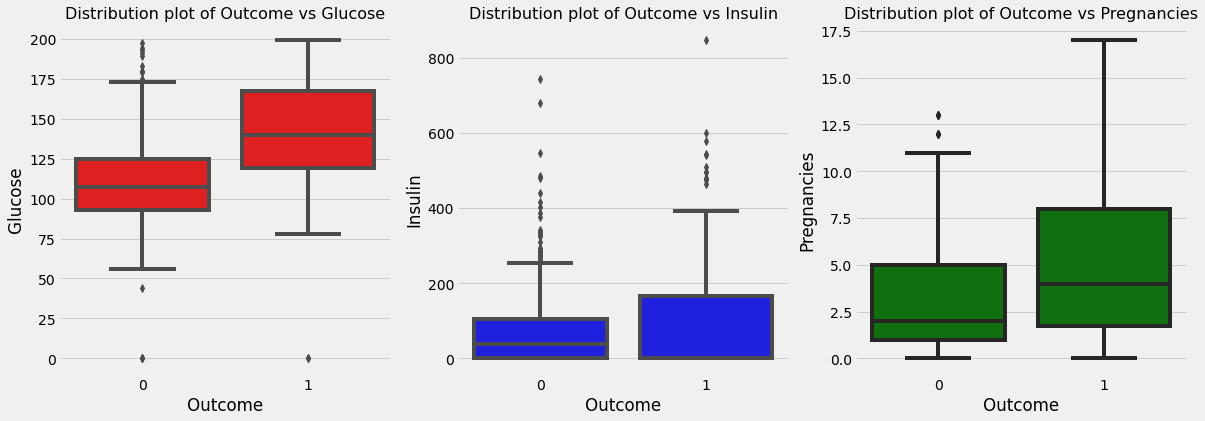

In [107]:
plt.rcParams['figure.figsize'] = (18,6)

plt.subplot(1,3,1)
sns.boxplot(x="Outcome", y="Glucose", data=df,color = 'red')
plt.title("Distribution plot of Outcome vs Glucose", fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(x="Outcome", y="Insulin", data=df, color='blue')
plt.title("Distribution plot of Outcome vs Insulin", fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(x="Outcome", y="Pregnancies", data=df, color='green')
plt.title("Distribution plot of Outcome vs Pregnancies", fontsize=16)

Text(0.5, 1.0, 'Distribution plot of Outcome vs DiabetesPedigreeFunction')

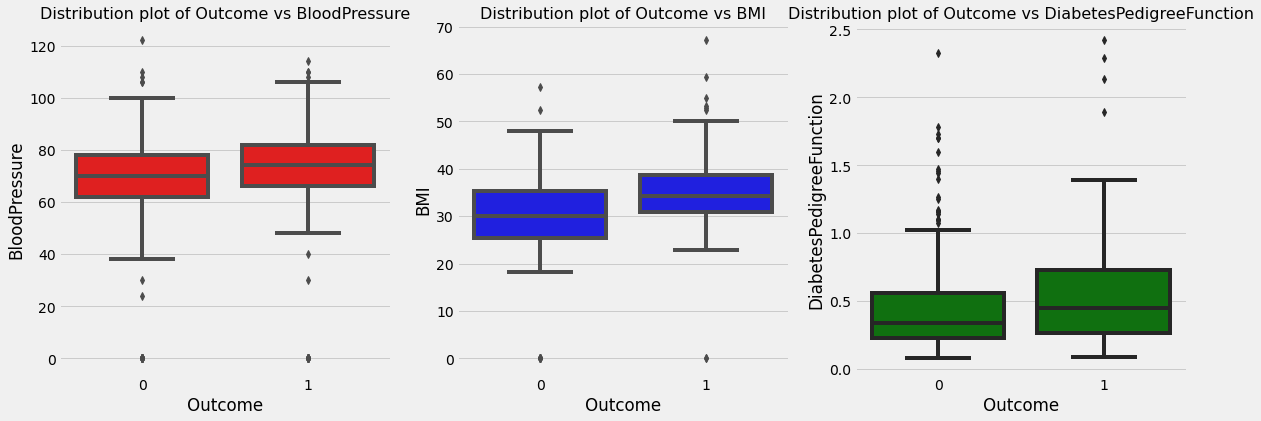

In [108]:
plt.rcParams['figure.figsize'] = (18,6)

plt.subplot(1,3,1)
sns.boxplot(x="Outcome", y="BloodPressure", data=df,color = 'red')
plt.title("Distribution plot of Outcome vs BloodPressure", fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(x="Outcome", y="BMI", data=df, color='blue')
plt.title("Distribution plot of Outcome vs BMI", fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df, color='green')
plt.title("Distribution plot of Outcome vs DiabetesPedigreeFunction", fontsize=16)

Text(0.5, 1.0, 'Distribution plot of Outcome vs SkinThickness')

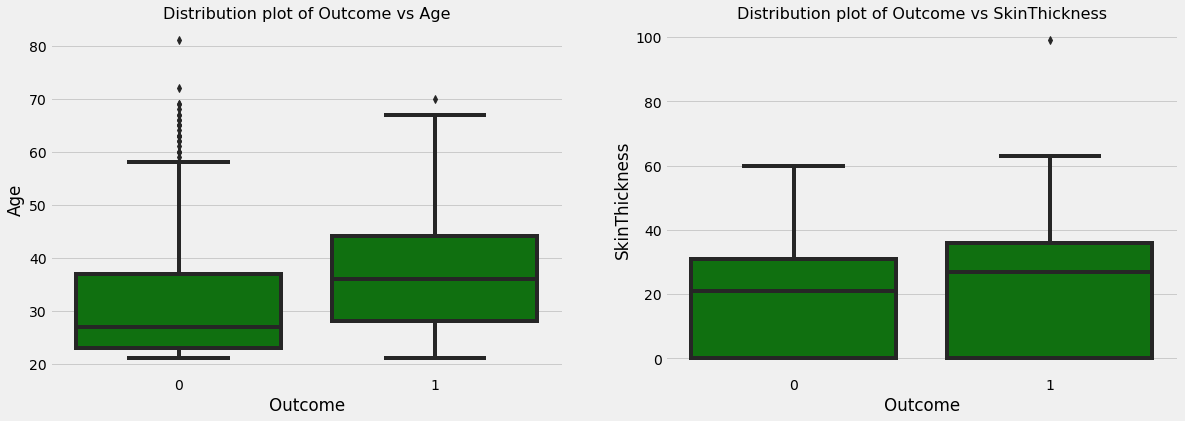

In [109]:
plt.rcParams['figure.figsize'] = (18,6)
plt.subplot(1,2,1)
sns.boxplot(x="Outcome", y="Age", data=df, color='green')
plt.title("Distribution plot of Outcome vs Age", fontsize=16)

plt.subplot(1,2,2)
sns.boxplot(x="Outcome", y="SkinThickness", data=df, color='green')
plt.title("Distribution plot of Outcome vs SkinThickness", fontsize=16)

### 2.2 Correlation and Regression

#### a) Find the correlation coefficient between the explanatory and response variable.

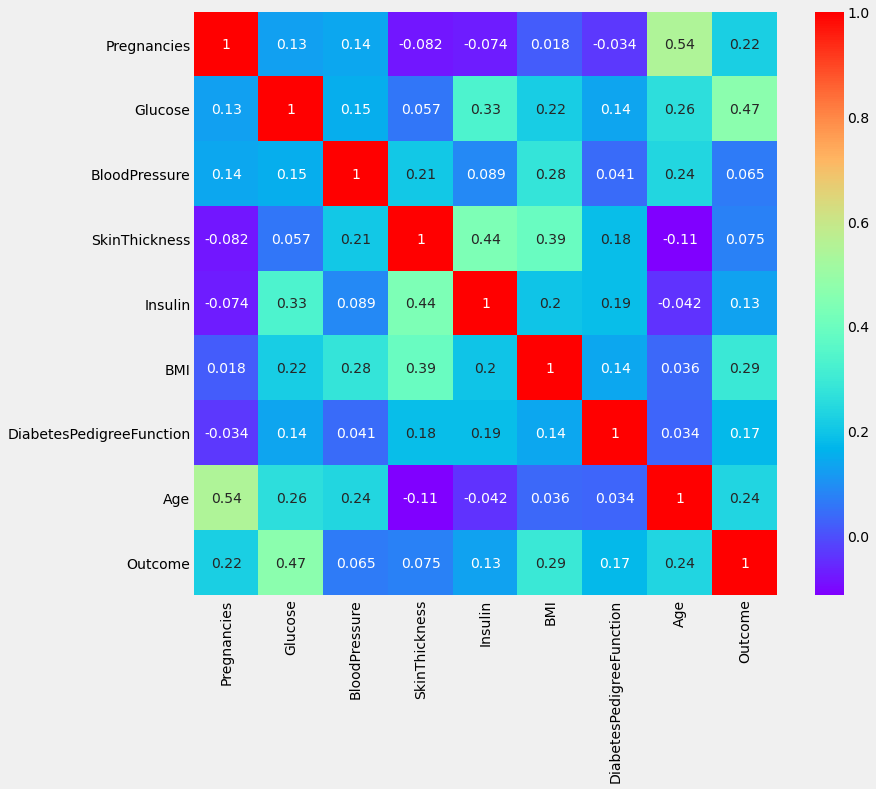

In [110]:
fig=plt.gcf()
fig.set_size_inches(12,10)
fig=sns.heatmap(df.corr('pearson'),annot=True,cmap='rainbow',square=True,mask=False)

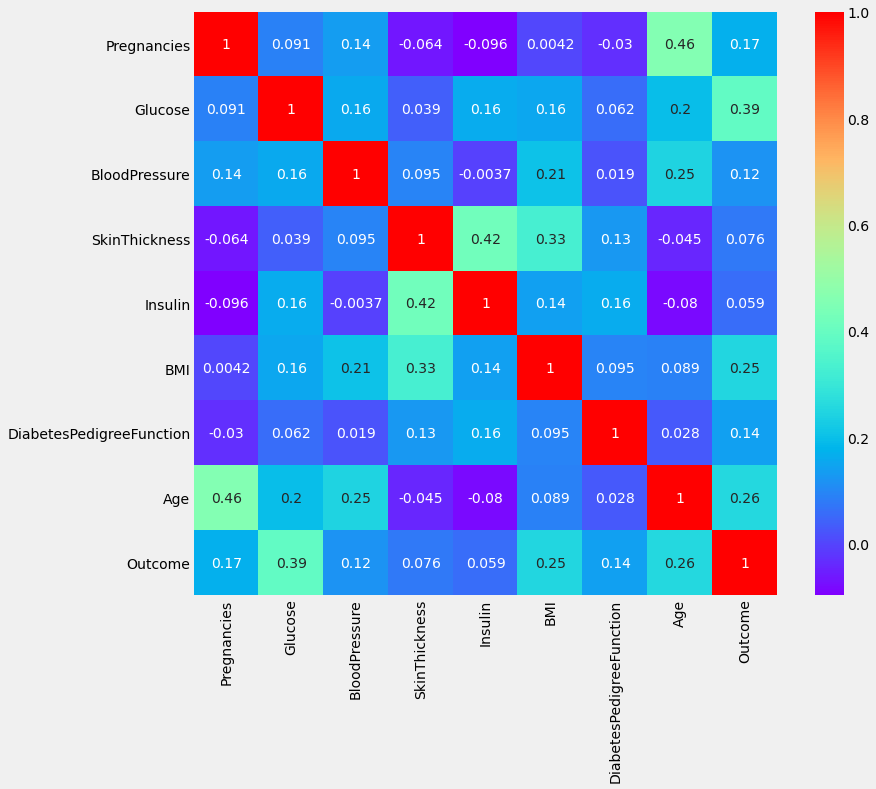

In [111]:
fig=plt.gcf()
fig.set_size_inches(12,10)
fig=sns.heatmap(df.corr('kendall'),annot=True,cmap='rainbow',square=True,mask=False)

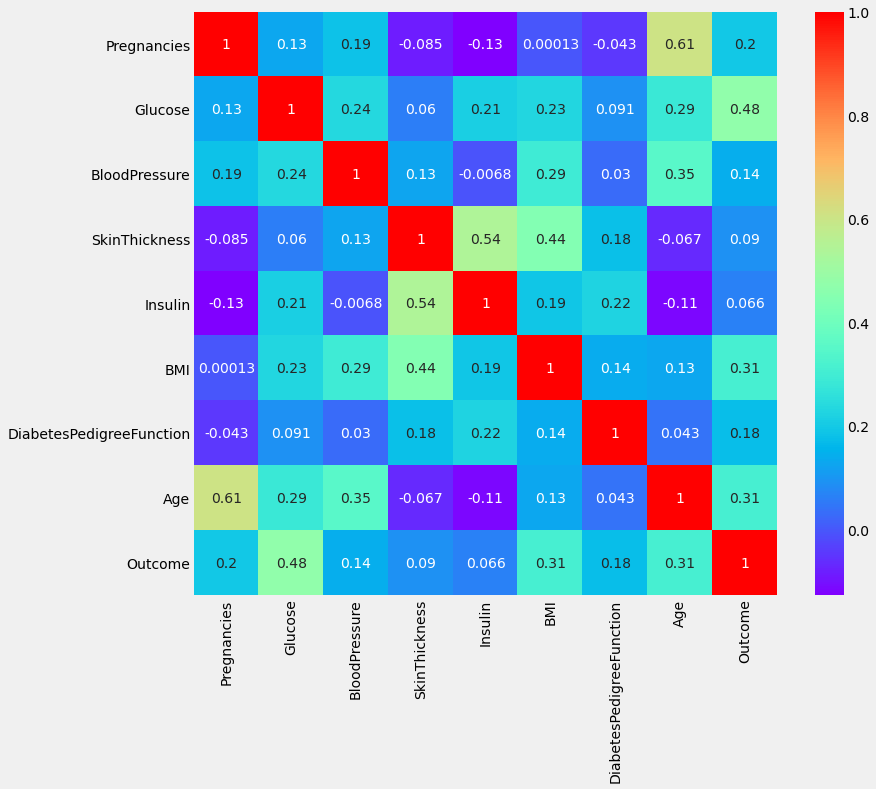

In [112]:
fig=plt.gcf()
fig.set_size_inches(12,10)
fig=sns.heatmap(df.corr('spearman'),annot=True,cmap='rainbow',square=True,mask=False)

##### b) Create a scatter diagram and find  R squared.

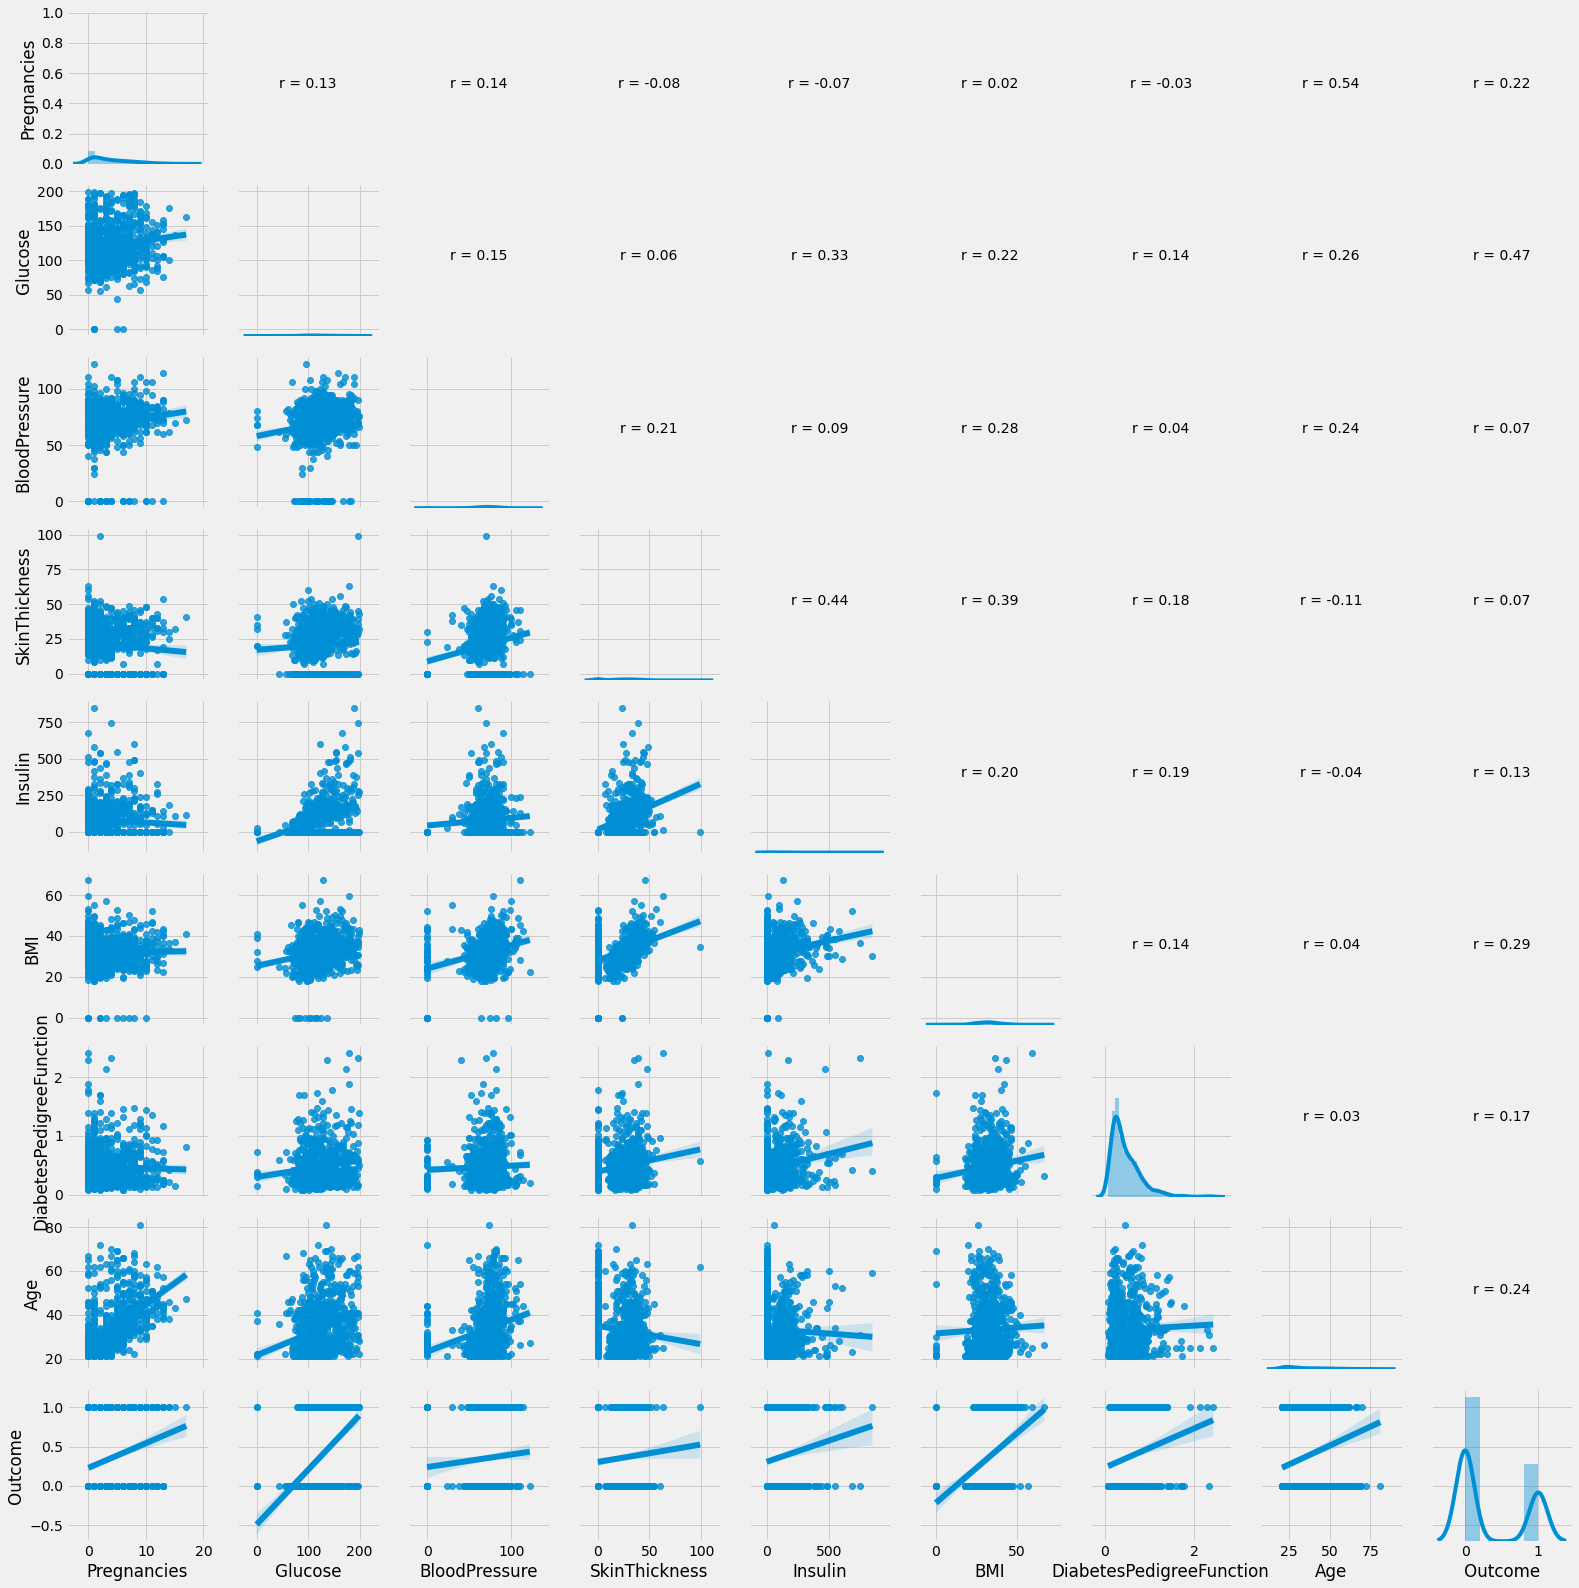

In [113]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(df)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

#### c) Validate if the correlation is significant by conducting a Hypothesis test.

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

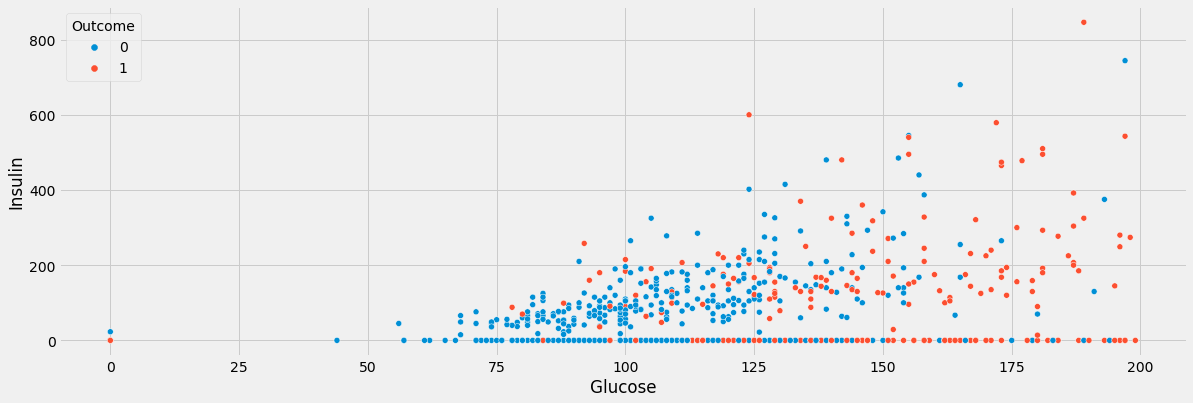

In [114]:
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

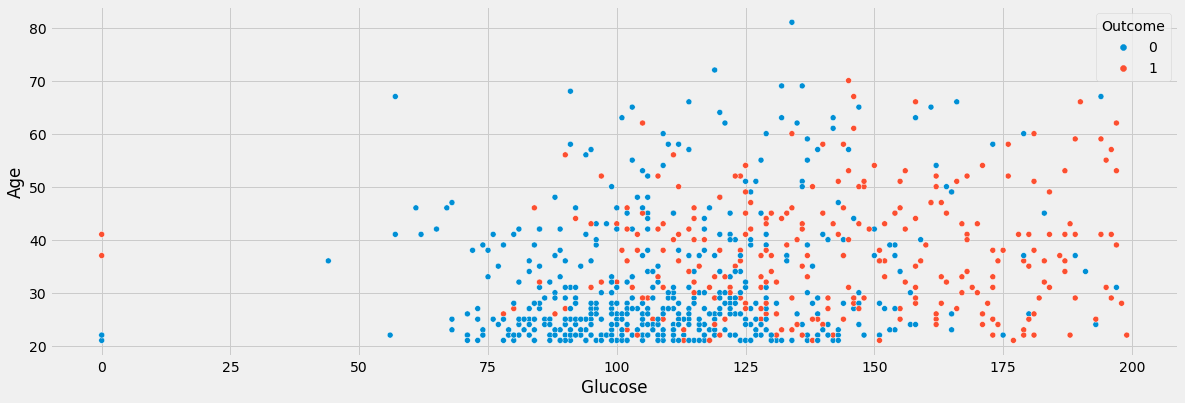

In [115]:
sns.scatterplot(data=df, x='Glucose', y='Age', hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

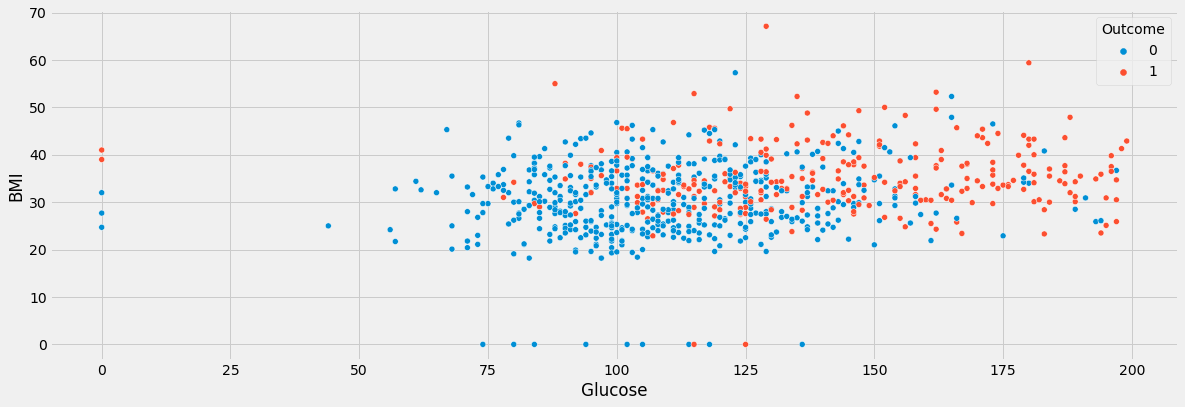

In [116]:
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='SkinThickness'>

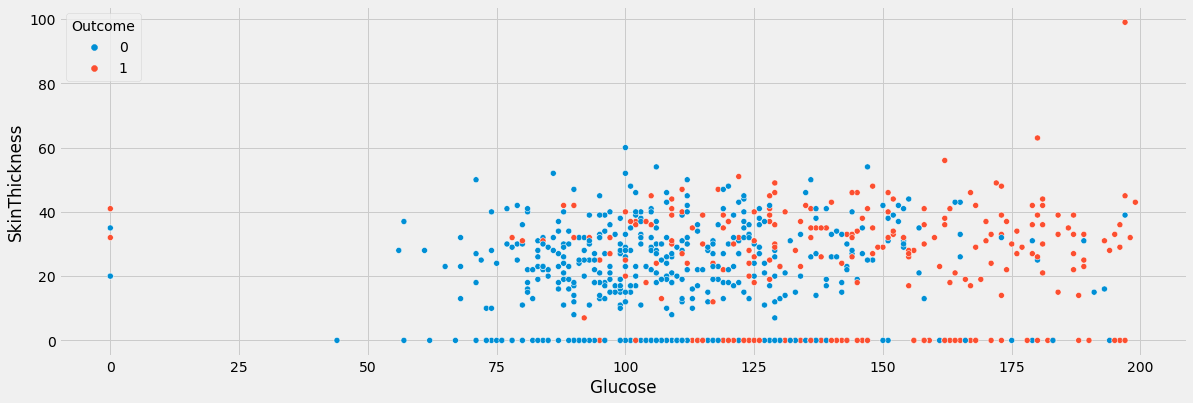

In [117]:
sns.scatterplot(data=df, x='Glucose', y='SkinThickness', hue='Outcome')

<h4>Rational/Findings </h4>

* Glucose, BMI, Insulin, SkinThickness and Age seem to have high correlation
* There are some 0 Glucose, Insulin and Blood Pressure values, which don't make sense.

### 2.4.2 Data Science Life Cycle:

#### a) Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,dealing with null and outlier values.

#### Check for null values

In [118]:
df.isnull().any().any()

False

There are no null values

#### Check for outliers

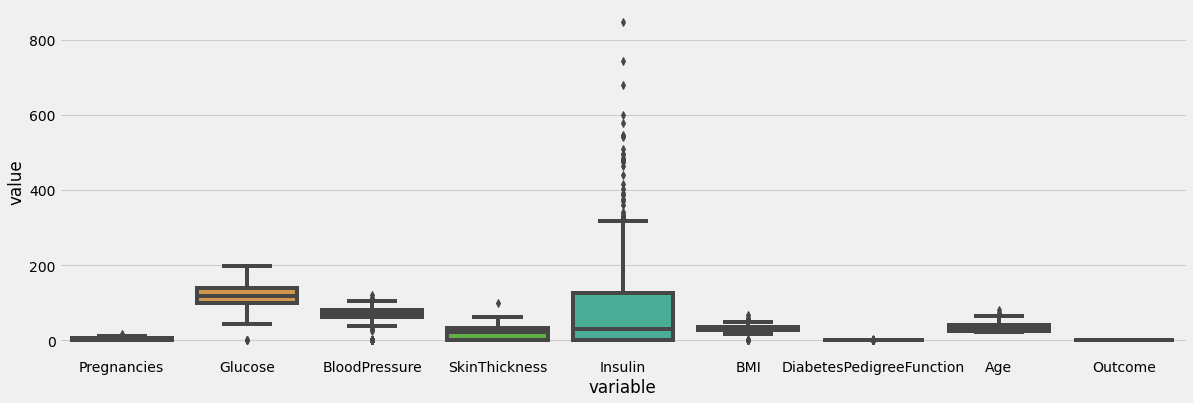

In [119]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

* There are some 0 values for Glucose, BloodPressure, SkinThickness, Insulin and BMI which don't make sense

* I'll replace the 0 values and the outliers with the mean value of the respective columns

##### b) Balance and resample if required
##### c) Conduct Feature Engineering and feature selection.
##### d) Divide data into test and training set. Use cross validation and bootstrap to avoid overfitting.

In [266]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sea

data_X = df.loc[:, df.columns != "Outcome"]
data_Y = df[["Outcome"]]

train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y,
                                                    test_size=0.2,
                                                    stratify=data_Y,
                                                    random_state=0)
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sea.distplot(train_X.loc[train_Y["Outcome"]==0,feature],
                 kde = False, color = "#004a4d", norm_hist=False,
                 hist_kws = dict(alpha=0.8), bins=40,
                 label="Not Diabetes", ax=ax1);
    sea.distplot(train_X.loc[train_Y["Outcome"]==1,feature],
                 kde = False, color = "#7d0101", norm_hist=False,
                 hist_kws = dict(alpha=0.6), bins=40,
                 label="Diabetes", ax=ax1);
    ax2 = fig.add_subplot(gs[0,3])    
    sea.boxplot(train_X[feature], orient="v", color = "#989100",
                width = 0.2, ax=ax2);
    
    ax1.legend(loc="upper right");

<h5> Feature 0 - Pregnancies </h5>

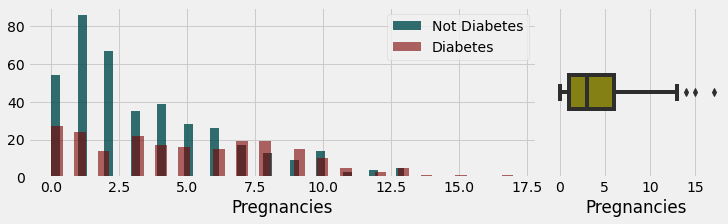

In [268]:
plots("Pregnancies")

* For Pregnancies feature, there are some measurements above upper whisker. These are rare events. We replace them with 95th quantile.

In [269]:
Q1 = train_X["Pregnancies"].quantile(0.25)
Q3 = train_X["Pregnancies"].quantile(0.75)
q95th = train_X["Pregnancies"].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Pregnancies"] = np.where(train_X["Pregnancies"] > UW,
                                  q95th, train_X["Pregnancies"])

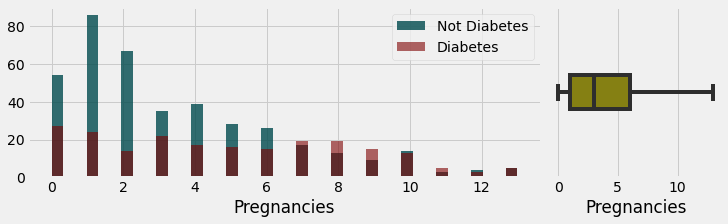

In [270]:
plots("Pregnancies")

<h5> Feature 1 - Glucose </h5>

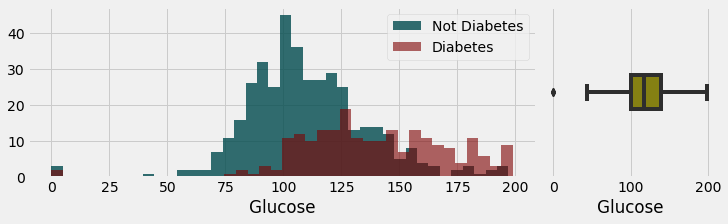

In [271]:
plots("Glucose")

* There are some 0 values for Glucose. We can deem 0 values as placeholder for missing data. So we replace them with median.

In [272]:
med = train_X["Glucose"].median()
train_X["Glucose"] = np.where(train_X["Glucose"] == 0, med, train_X["Glucose"])

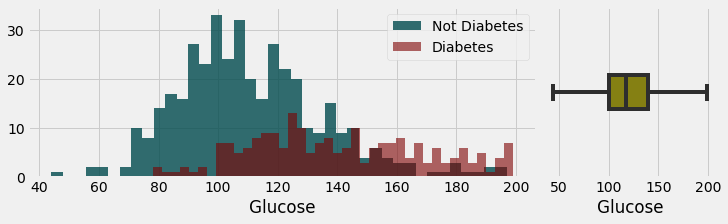

In [273]:
plots("Glucose")

<h5> Feature 2 - Blood Pressure </h5>

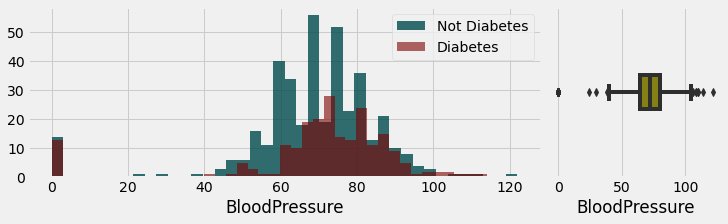

In [274]:
plots("BloodPressure")

* There are some 0 values for BloodPressure which is unlikely. So we replace them with median. Also, we replace values lower than LW (except zeros) with 5th quantile and replace values greater than UW with 95th quantile.

In [275]:
med = train_X["BloodPressure"].median()
q5th = train_X["BloodPressure"].quantile(0.05)
q95th = train_X["BloodPressure"].quantile(0.95)
Q1 = train_X["BloodPressure"].quantile(0.25)
Q3 = train_X["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR

train_X["BloodPressure"] = np.where(train_X["BloodPressure"] == 0,
                                    med, train_X["BloodPressure"])
train_X["BloodPressure"] = np.where(train_X["BloodPressure"] < LW,
                                    q5th, train_X["BloodPressure"])
train_X["BloodPressure"] = np.where(train_X["BloodPressure"] > UW,
                                    q95th, train_X["BloodPressure"])

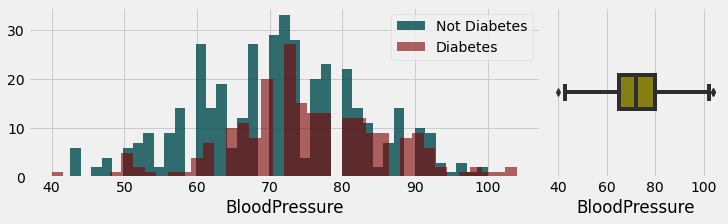

In [276]:
plots("BloodPressure")

<h5> Feature 3 - Skin Thickness </h5>

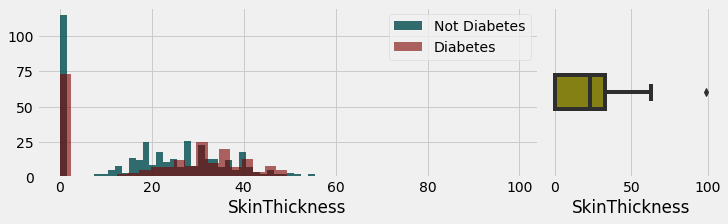

In [277]:
plots("SkinThickness")

* There are some 0 values for SkinThickness which is unlikely. So we replace them with median. Also, we replace values greater than UW with 95th quantile.

In [278]:
med = train_X["SkinThickness"].median()
q95th = train_X["SkinThickness"].quantile(0.95)
Q1 = train_X["SkinThickness"].quantile(0.25)
Q3 = train_X["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["SkinThickness"] = np.where(train_X["SkinThickness"] == 0,
                                    med, train_X["SkinThickness"])
train_X["SkinThickness"] = np.where(train_X["SkinThickness"] > UW,
                                    q95th, train_X["SkinThickness"])

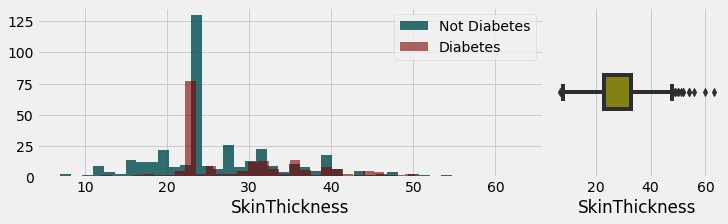

In [279]:
plots("SkinThickness")

<h5> Feature 4 - Insulin </h5>

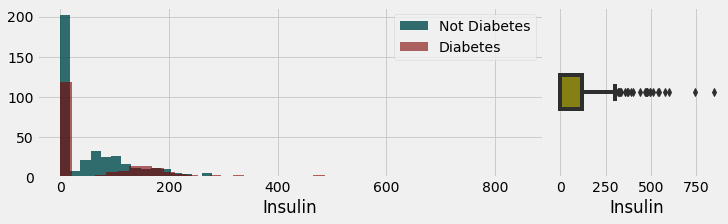

In [280]:
plots("Insulin")

* There are some 0 values for Insulin which is unlikely. So we replace them with 60th quantile becuse median is 0. Also, we replace values greater than UW with 95th quantile.

In [281]:
q60th = train_X["Insulin"].quantile(0.60)
q95th = train_X["Insulin"].quantile(0.95)
Q1 = train_X["Insulin"].quantile(0.25)
Q3 = train_X["Insulin"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Insulin"] = np.where(train_X["Insulin"] == 0,
                              q60th, train_X["Insulin"])
train_X["Insulin"] = np.where(train_X["Insulin"] > UW,
                              q95th, train_X["Insulin"])


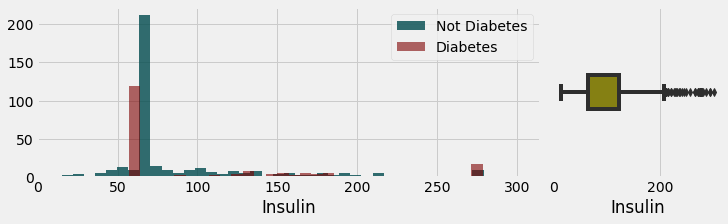

In [282]:
plots("Insulin")

<h5> Feature 5 - BMI </h5>

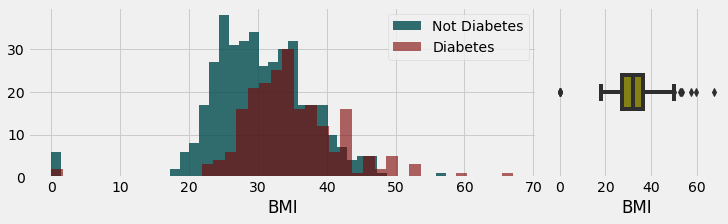

In [283]:
plots("BMI")

* There are some 0 values for BMI. We replace them with median. Also, we replace values greater than UW with q95th.

In [284]:
med = train_X["BMI"].median()
q95th = train_X["BMI"].quantile(0.95)
Q1 = train_X["BMI"].quantile(0.25)
Q3 = train_X["BMI"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["BMI"] = np.where(train_X["BMI"] == 0,
                          med, train_X["BMI"])
train_X["BMI"] = np.where(train_X["BMI"] > UW,
                          q95th, train_X["BMI"])


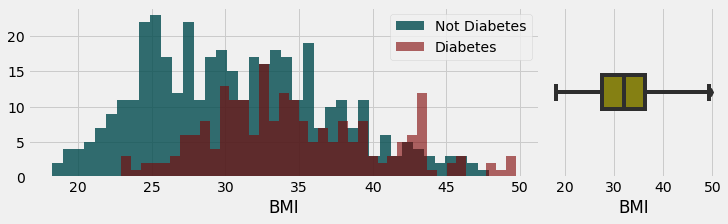

In [285]:
plots("BMI")

<h5> Feature 6 - DiabetesPedigreeFunction </h5>

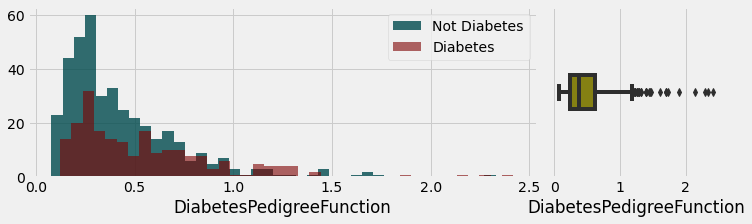

In [286]:
plots("DiabetesPedigreeFunction")

* We replace values greater than UWth with 95th

In [287]:
q95th = train_X["DiabetesPedigreeFunction"].quantile(0.95)
Q1 = train_X["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = train_X["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["DiabetesPedigreeFunction"] = np.where(
                        train_X["DiabetesPedigreeFunction"] > UW,
                        q95th, train_X["DiabetesPedigreeFunction"])

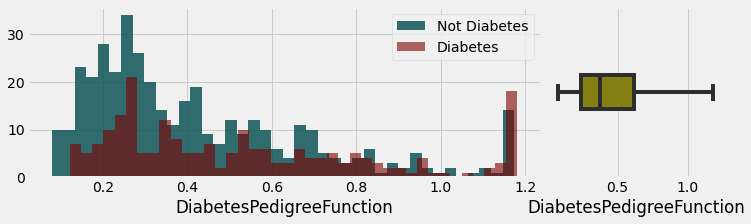

In [288]:
plots("DiabetesPedigreeFunction")

<h5> Feature 7 - Age </h5>

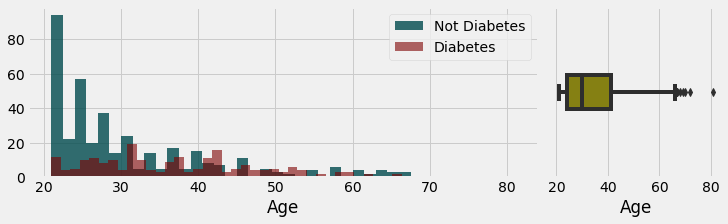

In [289]:
plots("Age")

* There are some measurements above UW due to rare events. We replace them with 95th quantile.

In [290]:
q95th = train_X["Age"].quantile(0.95)
Q1 = train_X["Age"].quantile(0.25)
Q3 = train_X["Age"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Age"] = np.where(train_X["Age"] > UW,
                          q95th, train_X["Age"])

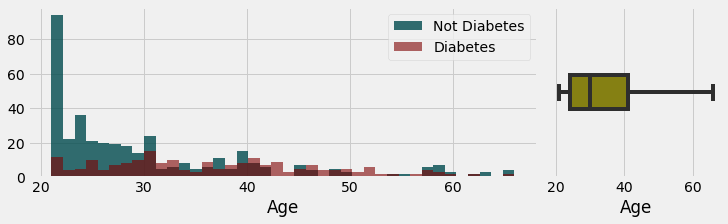

In [291]:
plots("Age")

In [292]:
# backup for latter analysis

train_X_orig, train_Y_orig, test_X_orig, test_Y_orig = train_X,train_Y,test_X,test_Y

In [293]:
train_X_orig

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,196.0,90.0,23.0,64.00,39.8,0.45100,41.0
1,2.0,81.0,72.0,15.0,76.00,30.1,0.54700,25.0
2,2.0,127.0,58.0,24.0,275.00,27.7,1.16005,25.0
3,0.0,105.0,68.0,22.0,64.00,20.0,0.23600,22.0
4,1.0,193.0,50.0,16.0,276.75,25.9,0.65500,24.0
...,...,...,...,...,...,...,...,...
609,1.0,135.0,54.0,23.0,64.00,26.7,0.68700,62.0
610,0.0,141.0,72.0,23.0,64.00,42.4,0.20500,29.0
611,3.0,82.0,70.0,23.0,64.00,21.1,0.38900,25.0
612,7.0,103.0,66.0,32.0,64.00,39.1,0.34400,31.0


### Research Question 1

<h5> Can we use Neural Network model to confirm the connection between model complexity and accuracy? </h5>

In [296]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(train_X, train_Y)
print("Accuracy on training set: {:.2f}".format(mlp.score(train_X, train_Y)))
print("Accuracy on test set: {:.2f}".format(mlp.score(test_X, test_Y)))

Accuracy on training set: 0.74
Accuracy on test set: 0.69


In [297]:
predicted = mlp.predict(test_X)

In [298]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(test_Y, predicted, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.691176,0.940000,0.796610,100.000000
1,0.666667,0.222222,0.333333,54.000000
accuracy,0.688312,0.688312,0.688312,0.688312
macro avg,0.678922,0.581111,0.564972,154.000000
weighted avg,0.682582,0.688312,0.634162,154.000000


* The accuracy of 0.69 with a 69% precision and a high 94% recall is not good enough. Can we make it better by scaling out our dataset?

In [299]:
from sklearn.preprocessing import StandardScaler
feature_names = train_X.columns

scaler = StandardScaler()

# fit to train_X
scaler.fit(train_X)

# transform train_X
train_X = scaler.transform(train_X)
train_X = pd.DataFrame(train_X, columns = feature_names)

# transform test_X
test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = feature_names)
mlp = MLPClassifier(random_state=0)
mlp.fit(train_X, train_Y)
print("Accuracy on training set: {:.2f}".format(
    mlp.score(train_X, train_Y)))
print("Accuracy on test set: {:.2f}".format(mlp.score(test_X, test_Y)))

Accuracy on training set: 0.80
Accuracy on test set: 0.80


In [300]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(train_X, train_Y)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(train_X, train_Y)))
print("Accuracy on test set: {:.3f}".format(mlp.score(test_X, test_Y)))

Accuracy on training set: 0.839
Accuracy on test set: 0.805


In [301]:
predicted = mlp.predict(test_X)

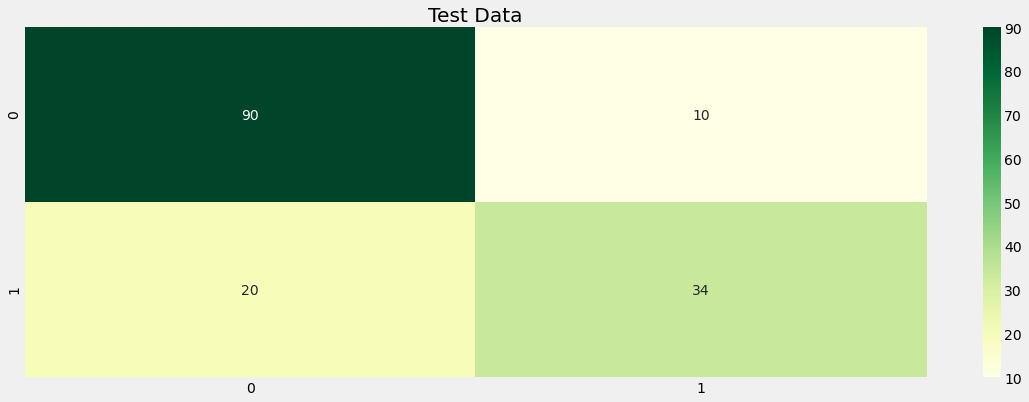

In [302]:
from sklearn.metrics import confusion_matrix
sns.heatmap((confusion_matrix(test_Y,predicted)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

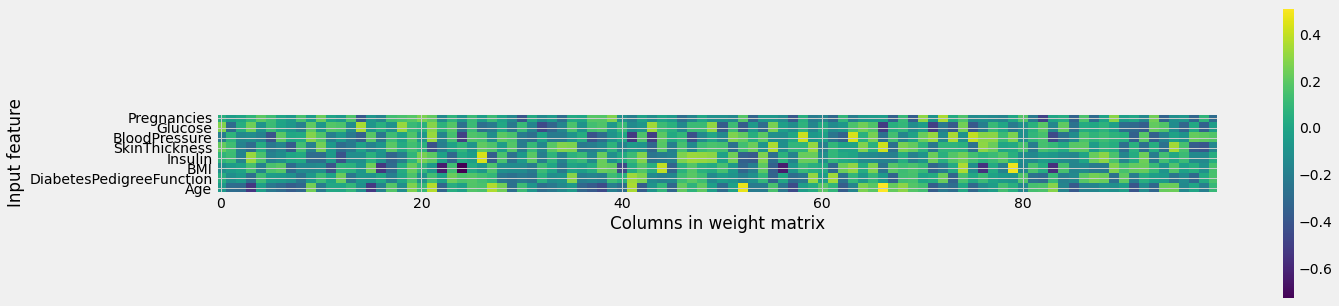

In [303]:
diabetes_features = [x for i,x in enumerate(df.columns) if i!=8]
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Conclusion:

From the heat map, it is not easy to point out quickly that which feature (features) have relatively low weights compared to the other features.

### Research Question 2

Can we use Regression to do some feature importance extraction, perhaps the above MLP model will perform better by filtering out less important features?

In [304]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=0, penalty="l1",
            class_weight="balanced", solver="saga", max_iter=5000)
lr1.fit(train_X, train_Y.values.ravel())

lr1.coef_

array([[ 3.60358322e-01,  1.06754141e+00, -2.50971359e-02,
        -9.81326043e-05, -6.49737080e-02,  5.74505582e-01,
         3.35113887e-01,  2.71385240e-01]])

In [305]:
# logistic regression with l2 penalty - embedded method
lr2 = LogisticRegression(random_state=0, penalty="l2",
            class_weight="balanced", solver="saga", max_iter=5000)
lr2.fit(train_X, train_Y.values.ravel())

lr2.coef_

array([[ 0.36506112,  1.07199682, -0.04073014, -0.01616834, -0.07560637,
         0.59537491,  0.34399744,  0.28125417]])

[13:40:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


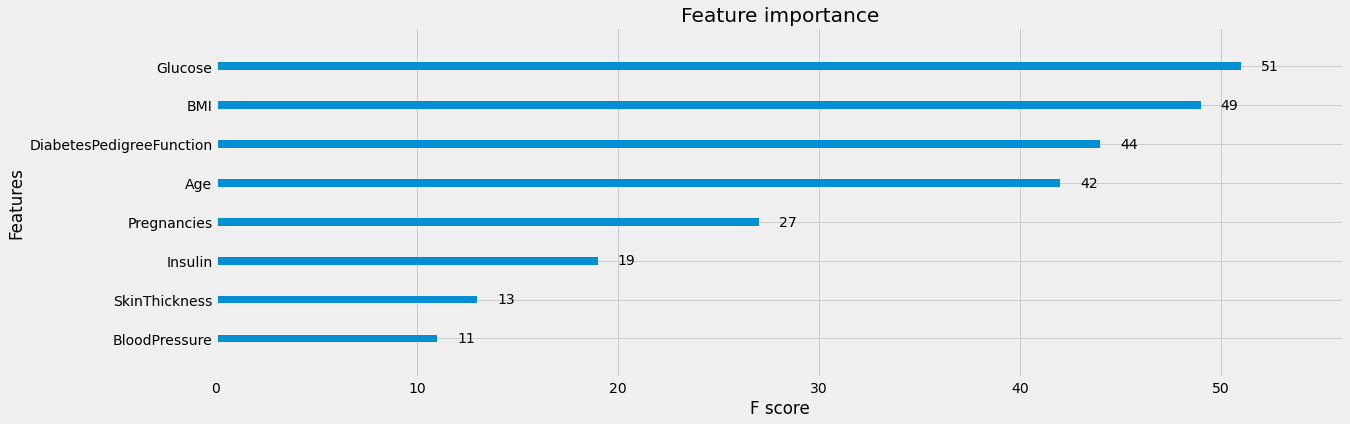

In [306]:
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# xgboost - embedded method
gb = xgb.XGBClassifier(booster="gbtree",
                      learning_rate=0.15,
                      max_depth=4,
                      n_estimators=20,
                      random_state=0)
gb.fit(train_X, train_Y.values.ravel())

plot_importance(gb);


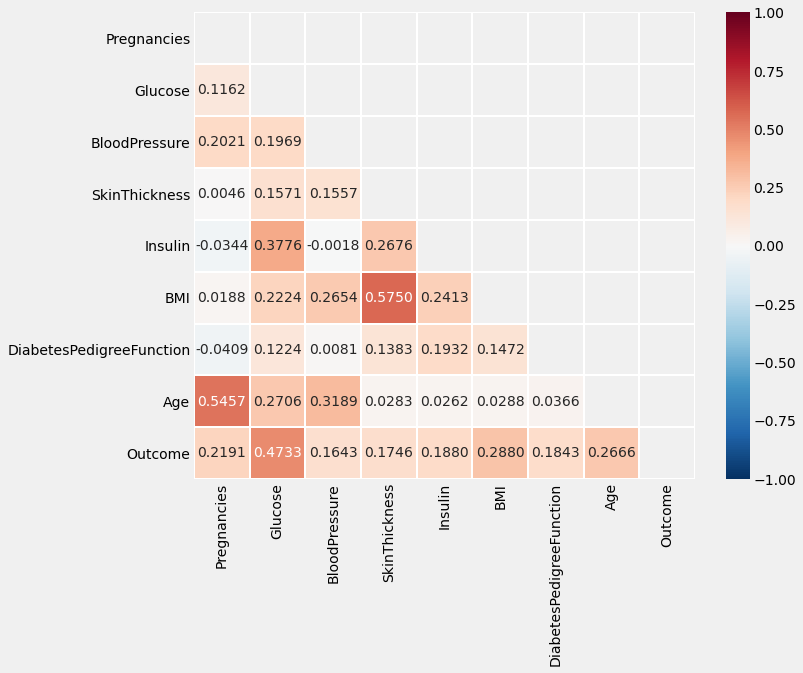

In [307]:
corr_matrix = pd.concat([train_X, train_Y], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(10,8))
sea.heatmap(corr_matrix,annot=True, fmt=".4f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="RdBu_r");


In [308]:
from sklearn.feature_selection import RFE
lr3 = LogisticRegression(random_state=0, penalty="l2",
            class_weight="balanced", solver="saga", max_iter=5000)
rfe_lr3 = RFE(lr3, n_features_to_select=7)
rfe_lr3.fit(train_X, train_Y.values.ravel())
print(diabetes_features)
print(rfe_lr3.support_)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[ True  True  True False  True  True  True  True]


#### Inference
From the above feature importance extraction, first three analysis mark BloodPressure, SkinThickness and Insulin as the least important features. Note that these features have very low correlation with Outcome. RFE marks SkinThickness as the least important.

In [309]:
train_X.drop("SkinThickness", axis=1, inplace=True)
test_X.drop("SkinThickness", axis=1, inplace=True)

In [310]:
train_X_orig

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,196.0,90.0,23.0,64.00,39.8,0.45100,41.0
1,2.0,81.0,72.0,15.0,76.00,30.1,0.54700,25.0
2,2.0,127.0,58.0,24.0,275.00,27.7,1.16005,25.0
3,0.0,105.0,68.0,22.0,64.00,20.0,0.23600,22.0
4,1.0,193.0,50.0,16.0,276.75,25.9,0.65500,24.0
...,...,...,...,...,...,...,...,...
609,1.0,135.0,54.0,23.0,64.00,26.7,0.68700,62.0
610,0.0,141.0,72.0,23.0,64.00,42.4,0.20500,29.0
611,3.0,82.0,70.0,23.0,64.00,21.1,0.38900,25.0
612,7.0,103.0,66.0,32.0,64.00,39.1,0.34400,31.0


In [311]:
mlp = MLPClassifier(solver="adam", max_iter=5000, activation = "relu",
                    hidden_layer_sizes = (12),                      
                    alpha = 0.01,
                    batch_size = 64,
                    learning_rate_init = 0.001,
                    random_state=2)

mlp.fit(train_X, train_Y.values.ravel());

In [312]:
print(classification_report(test_Y, mlp.predict(test_X),
                            digits = 4,
                            target_names=["Not Diabetes",
                                          "Diabetes"]))

              precision    recall  f1-score   support

Not Diabetes     0.8624    0.9400    0.8995       100
    Diabetes     0.8667    0.7222    0.7879        54

    accuracy                         0.8636       154
   macro avg     0.8645    0.8311    0.8437       154
weighted avg     0.8639    0.8636    0.8604       154



#### Conclusion
* By doing some feature engineering and feature importance selections, we have improved the NN model accuracy, precision while maintaining the recall.

### Research Question 3

How do other models compare? If we chose Support Vector Models to do classification, what would be the optimal C value?

In [360]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [471]:
# fixing our data

def split_data(df):
    
    data_X = df.loc[:, df.columns != "Outcome"]
    data_Y = df[["Outcome"]]

    train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y,
                                                    test_size=0.2,
                                                    stratify=data_Y,
                                                    random_state=0)
    train_X.reset_index(drop=True, inplace=True)
    test_X.reset_index(drop=True, inplace=True)
    train_Y.reset_index(drop=True, inplace=True)
    test_Y.reset_index(drop=True, inplace=True)
    return train_X, test_X, train_Y, test_Y

def fix_pregnancies(train_X):
    Q1 = train_X["Pregnancies"].quantile(0.25)
    Q3 = train_X["Pregnancies"].quantile(0.75)
    q95th = train_X["Pregnancies"].quantile(0.95)
    IQR = Q3 - Q1
    UW = Q3 + 1.5*IQR
    train_X["Pregnancies"] = np.where(train_X["Pregnancies"] > UW,
                                  q95th, train_X["Pregnancies"])
    return train_X

def fix_glucose(train_X):
    med = train_X["Glucose"].median()
    train_X["Glucose"] = np.where(train_X["Glucose"] == 0, med, train_X["Glucose"])
    return train_X


def fix_blood_pressure(train_X):
    med = train_X["BloodPressure"].median()
    q5th = train_X["BloodPressure"].quantile(0.05)
    q95th = train_X["BloodPressure"].quantile(0.95)
    Q1 = train_X["BloodPressure"].quantile(0.25)
    Q3 = train_X["BloodPressure"].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5*IQR
    UW = Q3 + 1.5*IQR

    train_X["BloodPressure"] = np.where(train_X["BloodPressure"] == 0,
                                        med, train_X["BloodPressure"])
    train_X["BloodPressure"] = np.where(train_X["BloodPressure"] < LW,
                                        q5th, train_X["BloodPressure"])
    train_X["BloodPressure"] = np.where(train_X["BloodPressure"] > UW,
                                        q95th, train_X["BloodPressure"])
    return train_X

def fix_skin_thickness(train_X):
    med = train_X["SkinThickness"].median()
    q95th = train_X["SkinThickness"].quantile(0.95)
    Q1 = train_X["SkinThickness"].quantile(0.25)
    Q3 = train_X["SkinThickness"].quantile(0.75)
    IQR = Q3 - Q1
    UW = Q3 + 1.5*IQR

    train_X["SkinThickness"] = np.where(train_X["SkinThickness"] == 0,
                                        med, train_X["SkinThickness"])
    train_X["SkinThickness"] = np.where(train_X["SkinThickness"] > UW,
                                        q95th, train_X["SkinThickness"])
    return train_X

def fix_insulin(train_X):
    q60th = train_X["Insulin"].quantile(0.60)
    q95th = train_X["Insulin"].quantile(0.95)
    Q1 = train_X["Insulin"].quantile(0.25)
    Q3 = train_X["Insulin"].quantile(0.75)
    IQR = Q3 - Q1
    UW = Q3 + 1.5*IQR

    train_X["Insulin"] = np.where(train_X["Insulin"] == 0,
                                  q60th, train_X["Insulin"])
    train_X["Insulin"] = np.where(train_X["Insulin"] > UW,
                                  q95th, train_X["Insulin"])
    return train_X

def fix_bmi(train_X):
    med = train_X["BMI"].median()
    q95th = train_X["BMI"].quantile(0.95)
    Q1 = train_X["BMI"].quantile(0.25)
    Q3 = train_X["BMI"].quantile(0.75)
    IQR = Q3 - Q1
    UW = Q3 + 1.5*IQR

    train_X["BMI"] = np.where(train_X["BMI"] == 0,
                              med, train_X["BMI"])
    train_X["BMI"] = np.where(train_X["BMI"] > UW,
                              q95th, train_X["BMI"])
    return train_X

def fix_dpf(train_X):
    q95th = train_X["DiabetesPedigreeFunction"].quantile(0.95)
    Q1 = train_X["DiabetesPedigreeFunction"].quantile(0.25)
    Q3 = train_X["DiabetesPedigreeFunction"].quantile(0.75)
    IQR = Q3 - Q1
    UW = Q3 + 1.5*IQR

    train_X["DiabetesPedigreeFunction"] = np.where(
                            train_X["DiabetesPedigreeFunction"] > UW,
                            q95th, train_X["DiabetesPedigreeFunction"])
    return train_X

def fix_age(train_X):
    q95th = train_X["Age"].quantile(0.95)
    Q1 = train_X["Age"].quantile(0.25)
    Q3 = train_X["Age"].quantile(0.75)
    IQR = Q3 - Q1
    UW = Q3 + 1.5*IQR

    train_X["Age"] = np.where(train_X["Age"] > UW,
                              q95th, train_X["Age"])
    return train_X

# resetting our data
def reset_data(df):
    # reseting our training, test and validation data
    data_X = df.loc[:, df.columns != "Outcome"]
    data_Y = df[["Outcome"]]

    train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y,
                                                        test_size=0.2,
                                                        stratify=data_Y,
                                                        random_state=0)
    train_X.reset_index(drop=True, inplace=True)
    test_X.reset_index(drop=True, inplace=True)
    train_Y.reset_index(drop=True, inplace=True)
    test_Y.reset_index(drop=True, inplace=True)
    train_X, test_X, train_Y, test_Y = split_data(df)
    
    train_X=fix_pregnancies(train_X)
    train_X=fix_glucose(train_X)
    train_X=fix_blood_pressure(train_X)
    train_X=fix_skin_thickness(train_X)
    train_X=fix_insulin(train_X)
    train_X=fix_bmi(train_X)
    train_X=fix_dpf(train_X)
    train_X=fix_age(train_X)

    return train_X, test_X, train_Y, test_Y
    

In [533]:
# reseting our training, test and validation data
train_X, test_X, train_Y, test_Y = reset_data(df)

In [534]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(train_X, train_Y)

print("Accuracy on training set: {:.2f}".format(svc.score(train_X, train_Y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_X, test_Y)))


Accuracy on training set: 0.76
Accuracy on test set: 0.77


In [536]:
# linear Kernel
from sklearn.metrics import accuracy_score, recall_score,f1_score

m=10
accuracy,recall,f1 = [],[],[]
x_axis = [i for i in range(1,m)]
for i in range(1,m):
    svm_c = SVC(kernel='linear',C=i,gamma='auto')
    svm_c.fit(train_X,train_Y)
    y_pred_i = svm_c.predict(test_X)
    accuracy.append(accuracy_score(test_Y,y_pred_i))
    recall.append(recall_score(test_Y,y_pred_i))
    f1.append(f1_score(test_Y,y_pred_i))
#     print("For C = {},".format(i),"confusion matrix : \n",confusion_matrix(test_Y,y_pred_i),"\n")

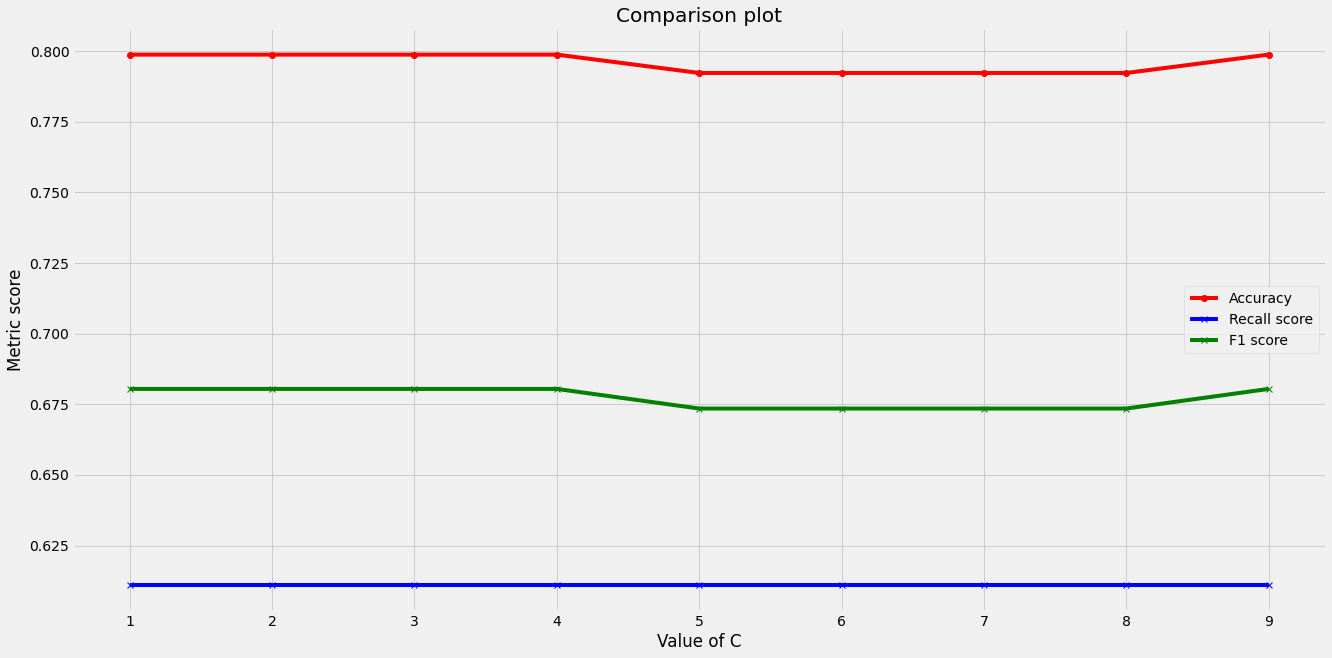

In [537]:
plt.figure(figsize=(20,10))
plt.plot(x_axis,accuracy,color='red',marker='o',label='Accuracy')
plt.plot(x_axis,recall,color='blue',marker='x',label='Recall score')
plt.plot(x_axis,f1,color='green',marker='x',label='F1 score')
plt.legend()
plt.xlabel("Value of C")
plt.ylabel("Metric score")
plt.title("Comparison plot")
plt.show()

* From the above plot, its hard to pick any particular C value which would give best accuracy, so we pick the one that is closest C=1

In [499]:
svc = SVC(kernel='linear',C=1,gamma='auto')
svc.fit(train_X, train_Y)

print("Accuracy on training set: {:.2f}".format(svc.score(train_X, train_Y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_X, test_Y)))

Accuracy on training set: 0.78
Accuracy on test set: 0.80


What about effect on scaling?

In [500]:
scaler = StandardScaler()
# fit to train_X
scaler.fit(train_X)
# transform train_X
train_X = scaler.transform(train_X)
train_X = pd.DataFrame(train_X, columns = feature_names)

# transform test_X
test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = feature_names)

In [501]:
svc = SVC(kernel='linear',C=1,gamma='auto')
svc.fit(train_X, train_Y)

print("Accuracy on training set: {:.2f}".format(svc.score(train_X, train_Y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_X, test_Y)))

Accuracy on training set: 0.79
Accuracy on test set: 0.80


In [502]:
predicted = svc.predict(test_X)

In [503]:
print(classification_report(test_Y, predicted,
                            target_names=["Not Diabetes",
                                          "Diabetes"]))

              precision    recall  f1-score   support

Not Diabetes       0.81      0.90      0.85       100
    Diabetes       0.77      0.61      0.68        54

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



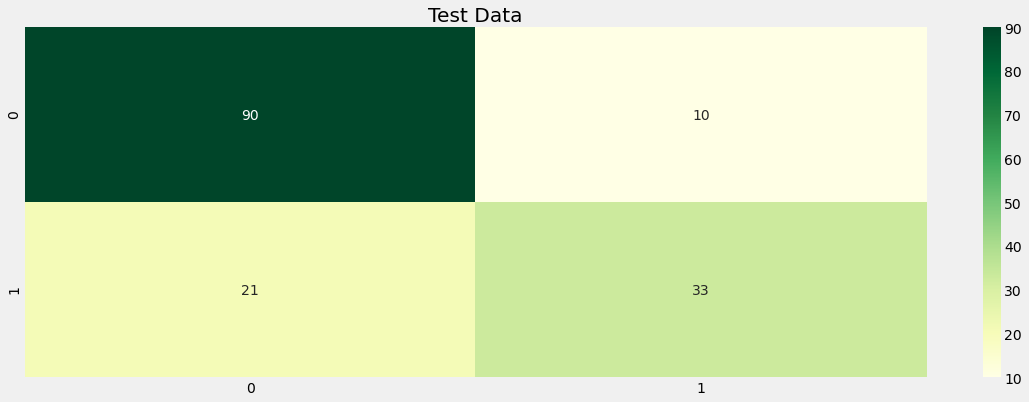

In [504]:
sns.heatmap((confusion_matrix(test_Y,predicted)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

Will removing `SkinThickness` based on our previous feature engineering importance work help our SVC model? Lets see.

In [505]:
train_X.drop("SkinThickness", axis=1, inplace=True)
test_X.drop("SkinThickness", axis=1, inplace=True)

In [506]:
svc = SVC(kernel='linear',C=1,gamma='auto')
svc.fit(train_X, train_Y)

print("Accuracy on training set: {:.2f}".format(svc.score(train_X, train_Y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_X, test_Y)))

Accuracy on training set: 0.78
Accuracy on test set: 0.78


Not really as the accuracy dropped from what it was previously. 

In [507]:
train_X.drop("BloodPressure", axis=1, inplace=True)
test_X.drop("BloodPressure", axis=1, inplace=True)

In [508]:
svc = SVC(kernel='linear',C=1,gamma='auto')
svc.fit(train_X, train_Y)

print("Accuracy on training set: {:.2f}".format(svc.score(train_X, train_Y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_X, test_Y)))

Accuracy on training set: 0.77
Accuracy on test set: 0.79


Removing features with less importance is not making our SVC model any better.

### Research Question 4

Does using Ensemble technique help us with a model with better accuracy?

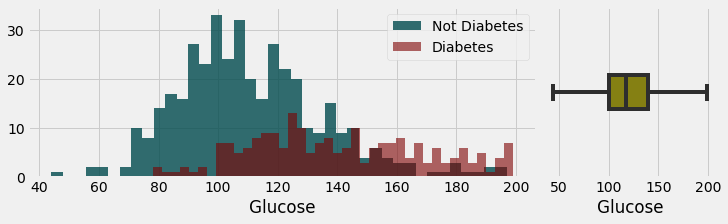

In [509]:
# reseting our training, test and validation data
train_X, test_X, train_Y, test_Y = reset_data(df)
plots("Glucose")

In [538]:
def plot_feature_importances_diabetes(model, txt):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel(f"{txt} Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [539]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)
print("Accuracy on training set: {:.3f}".format(rf.score(train_X, train_Y)))
print("Accuracy on test set: {:.3f}".format(rf.score(test_X, test_Y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


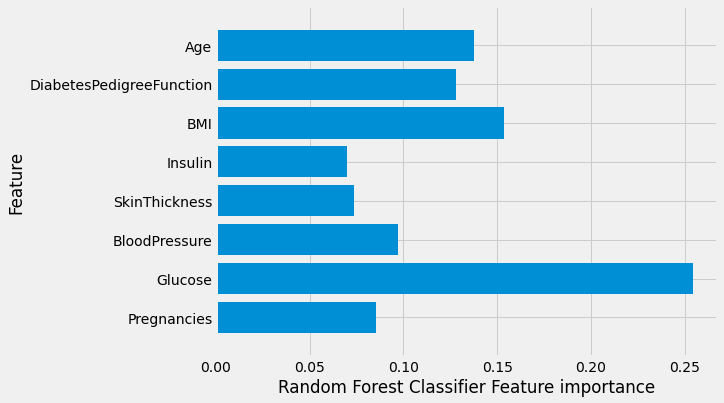

In [540]:
plot_feature_importances_diabetes(rf, "Random Forest Classifier")

In [542]:
m=50
accuracy,recall,f1 = [],[],[]
x_axis = [i for i in range(1,m)]
for i in range(1,m):
    rf = RandomForestClassifier(max_depth=i, n_estimators=100, random_state=66)
    rf.fit(train_X,train_Y)
    y_pred_i = rf.predict(test_X)
    accuracy.append(accuracy_score(test_Y,y_pred_i))
    recall.append(recall_score(test_Y,y_pred_i))
    f1.append(f1_score(test_Y,y_pred_i))

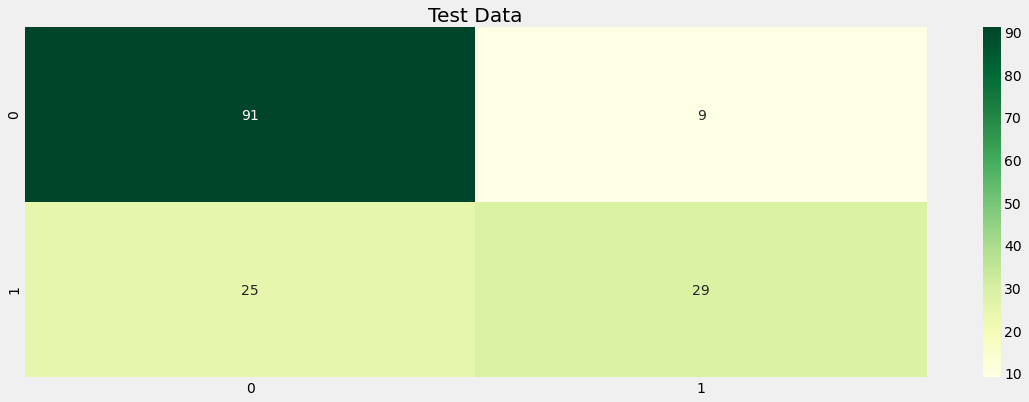

In [543]:
sns.heatmap((confusion_matrix(test_Y,rf.predict(test_X))),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

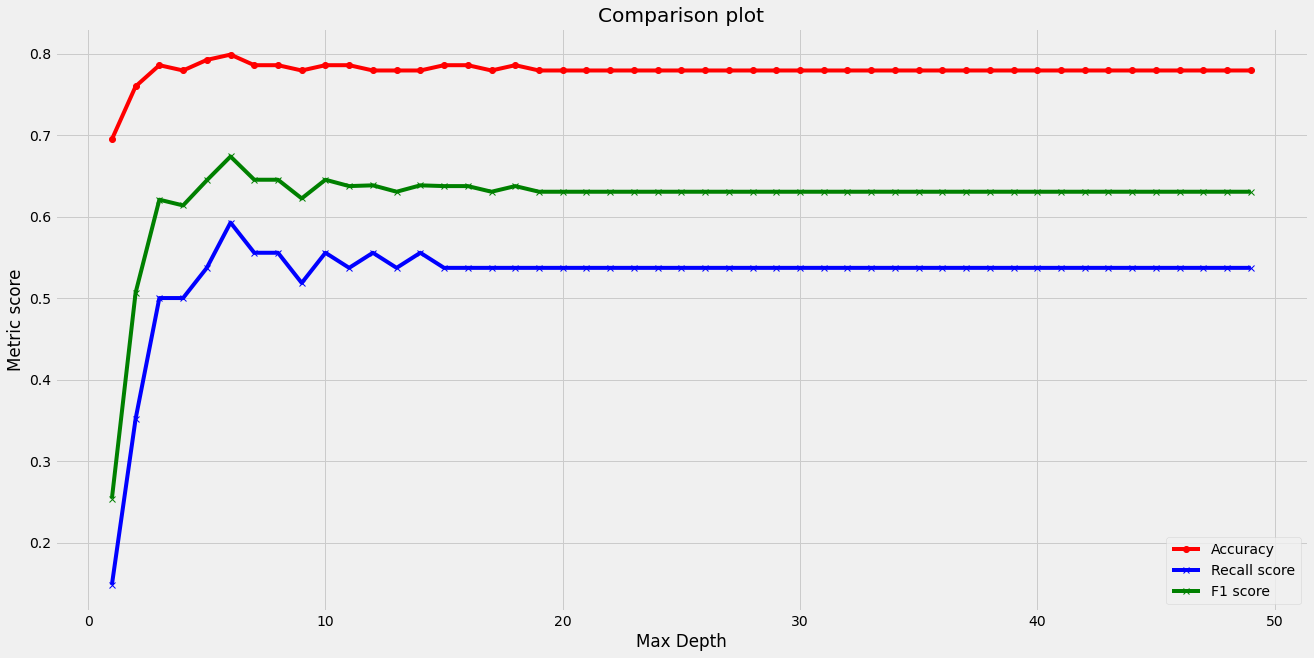

In [517]:
plt.figure(figsize=(20,10))
plt.plot(x_axis,accuracy,color='red',marker='o',label='Accuracy')
plt.plot(x_axis,recall,color='blue',marker='x',label='Recall score')
plt.plot(x_axis,f1,color='green',marker='x',label='F1 score')
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Metric score")
plt.title("Comparison plot")
plt.show()

How does Random Forest Classifier compare to other classifiers?

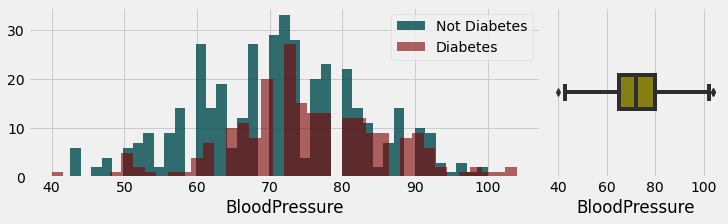

In [518]:
# reseting our training, test and validation data
train_X, test_X, train_Y, test_Y = reset_data(df)
plots("BloodPressure")

In [519]:
scaler = StandardScaler()
# fit to train_X
scaler.fit(train_X)
# transform train_X
train_X = scaler.transform(train_X)
train_X = pd.DataFrame(train_X, columns = feature_names)

# transform test_X
test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = feature_names)

In [520]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.linear_model import RidgeClassifier as rgc
from sklearn.ensemble import RandomForestClassifier as rfc, AdaBoostClassifier as ada

In [521]:
classifiers = [
    knnc(),
    dtc(),
    SVC(kernel='sigmoid'),
    SVC(kernel='sigmoid'),
    rgc(),
    rfc(n_estimators=600),
    ada(),
      ]
classifier_names = [
    'KNN',
    'Decision Tree',
    'SVC',
    'SVC with sigmoid kernel',
    'Gaussian Naive Bayes',
    'RidgeClassifier',
    'RandomForest',
    'Adaboost'    
    ]

In [522]:
from sklearn.model_selection import cross_val_score,KFold

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train_X,train_Y, cv=5)
    
    print(clf_name, ' mean accuracy: ', 
          round(cv_scores.mean()*100, 3), '% std: ', 
          round(cv_scores.var()*100, 3),'%')


KNN  mean accuracy:  70.524 % std:  0.037 %
Decision Tree  mean accuracy:  68.235 % std:  0.062 %
SVC  mean accuracy:  72.482 % std:  0.04 %
SVC with sigmoid kernel  mean accuracy:  72.482 % std:  0.04 %
Gaussian Naive Bayes  mean accuracy:  77.201 % std:  0.039 %
RidgeClassifier  mean accuracy:  73.78 % std:  0.016 %
RandomForest  mean accuracy:  72.961 % std:  0.077 %


RandomForest has a mean an average accuracy among different classifiers. 